## COVID-19

Date: 2020, 31 Mar

Seminar for the graduate course in Modeling and Simulation of Physical Systems [FEMT16](https://nastava.fesb.unist.hr/nastava/predmeti/11623), taught by professors Dragan Poljak and Ivica Puljak. 

In [107]:
# libs
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import datetime as dt

from covid_19.utils import normalize, restore, moving_average, train_test_split, cdf
from covid_19.plotting import plotData, figsize, latexconfig
from covid_19.exponential_models import ExponentialModel, LogisticModel
from covid_19.compartmental_models import SIR, SEIR

# enable LaTex figure formatting
latexconfig()

In [108]:
# data
confirmed_cases = np.loadtxt('data/cro/confirmed_cases.dat')
recovered_cases = np.loadtxt('data/cro/recovered_cases.dat')

# train-test split 
ratio = 1.
train_confirmed_cases, test_confirmed_cases = train_test_split(confirmed_cases, ratio)
train_recovered_cases, test_recovered_cases = train_test_split(recovered_cases, ratio)

# days since first case
x = np.arange(len(confirmed_cases))

In [130]:
sir = SIR()
initial_conditions = [4e6, confirmed_cases[0], recovered_cases[0]]
beta, gamma = sir.fit(confirmed_cases, recovered_cases, initial_conditions)
n_days = len(confirmed_cases) * 3
sol = sir.predict(n_days)

In [135]:
seir = SEIR()

In [146]:
initial_conditions = [10000, 0, confirmed_cases[0], recovered_cases[0]]
seir.fit(confirmed_cases, recovered_cases, initial_conditions)
n_days = len(confirmed_cases) * 3
sol = seir.predict(n_days)

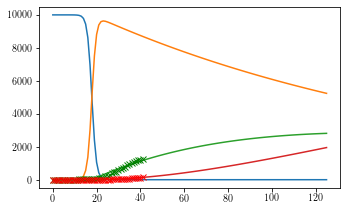

In [147]:
plt.plot(sol.y[0])
plt.plot(sol.y[1])
plt.plot(sol.y[2])
plt.plot(sol.y[3])
plt.plot(confirmed_cases, 'gx')
plt.plot(recovered_cases, 'rx')